### Regression

##### IMPORTING LIBRARIES

In [139]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression
from math import sqrt

#### Data Reading

In [140]:
df=pd.read_csv(r"C:\Users\Admin\MLP\DATA\Data.csv")

In [141]:
df.columns

Index(['Unnamed: 0', 'FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth',
       'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'weatherCode', 'pressure', 'cloudcover', 'tempF',
       'WindChillF', 'time', 'precipMM', 'DewPointF', 'humidity',
       'windspeedKmph', 'visibility', 'WindGustKmph', 'winddirDegree', 'date',
       'airport'],
      dtype='object')

In [142]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,time,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree,date,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
1,2016-01-01,1,2016,1,1,759.0,1.0,800,35.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
2,2016-01-01,1,2016,1,1,705.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
3,2016-01-01,1,2016,1,1,754.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
4,2016-01-01,1,2016,1,1,740.0,0.0,800,2.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA


In [143]:
df.isnull().sum()

FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
OriginAirportID    0
DestAirportID      0
ArrTime            0
CRSArrTime         0
ArrDel15           0
ArrDelayMinutes    0
weatherCode        0
pressure           0
cloudcover         0
tempF              0
WindChillF         0
time               0
precipMM           0
DewPointF          0
humidity           0
windspeedKmph      0
visibility         0
WindGustKmph       0
winddirDegree      0
date               0
airport            0
dtype: int64

In [144]:
df.shape

(1851436, 30)

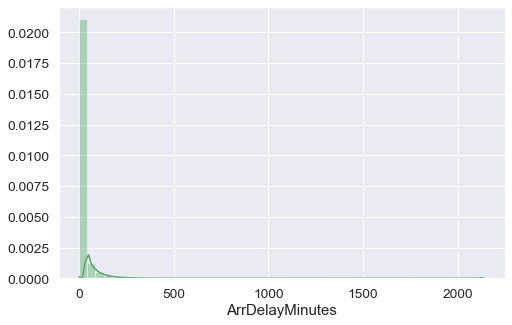

In [145]:
plt.figure(figsize=(8,5))
sns.distplot(df['ArrDelayMinutes'],color='g')

##### There is no missing values!

#### Feature Engineering

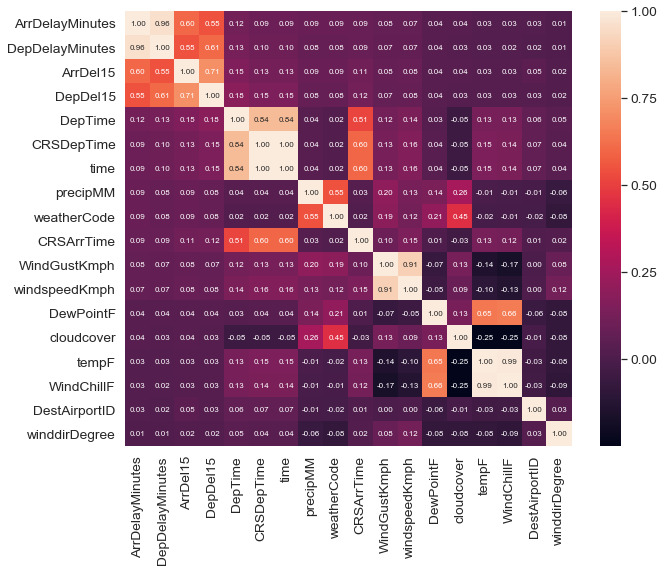

In [147]:
comat=df.corr()
k=18
col=comat.nlargest(k,'ArrDelayMinutes')['ArrDelayMinutes'].index
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True, fmt='.2f', annot_kws={'size':8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [148]:
features=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','tempF','WindChillF']
prediction=['ArrDelayMinutes']

In [149]:
X=df[features].values
y=df[prediction].values

In [150]:
print("X-Shape:",X.shape)
print("Y-Shape:",y.shape)

X-Shape: (1851436, 12)
Y-Shape: (1851436, 1)


#### Train ,Test Split

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

### Regressions:

#### 1.Linear Regression:

In [152]:
LR=LinearRegression()
reg=LR.fit(X_train,y_train)

In [153]:
p=LR.predict(X_test)

In [154]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p,y_test))
print("MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p,y_test)))
print("R2_SCORE:",metrics.r2_score(y_test,p))

MEAN ABSOLUTE ERROR: 5.528545530777275
MEAN SQUARE ERROR: 10.837637700684649
R2_SCORE: 0.9323522133669964


#### 2.Extra Tree Regressor:

In [155]:
from sklearn.ensemble import ExtraTreesRegressor

In [156]:
ETR=ExtraTreesRegressor()
reg1=ETR.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [157]:
p1=ETR.predict(X_test)

In [158]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p1,y_test))
print(" ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p1,y_test)))
print("R2_SCORE:",metrics.r2_score(p1,y_test))

MEAN ABSOLUTE ERROR: 5.926095806679858
 ROOT MEAN SQUARE ERROR: 10.885779264336156
R2_SCORE: 0.9281520121308847


#### 3.XGBRegressor

In [159]:
import xgboost 
from xgboost import XGBRegressor
XGB=XGBRegressor()
reg2=XGB.fit(X_train,y_train)

In [160]:
pre=XGB.predict(X_test)

In [161]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pre,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pre,y_test)))
print("r2_SCORE:",metrics.r2_score(y_test,pre))

MEAN ABSOLUTE ERROR: 5.640037705735595
ROOT MEAN SQUARE ERROR: 10.345714080884102
r2_SCORE: 0.9383539466092741


#### 4.LASSO REGRESSION

In [173]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(X_train,y_train)
pred=LS.predict(X_test)

In [174]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred,y_test)))
print("r2_SCORE:",metrics.r2_score(y_test,pred))

MEAN ABSOLUTE ERROR: 5.527841290951223
ROOT MEAN SQUARE ERROR: 10.839748370326722
r2_SCORE: 0.9323258614926829


#### Regression Analysis

### TABULAR VALUES OF REGRESSION -To choose the best

In [175]:
from tabulate import tabulate
table = [["Linear Regression",93.23,10.83,5.52],["ExtraTreeRegressor",92,10.88,5.92],["XGBRegressor",93.83,10.34,5.64,"BEST"],["LassoRegressor",93.23,10.83,5.52,]]
print(tabulate(table, headers=["REGRESSION","R2_SCORE", "RMSE","MAE","BETTER MODEL"]))

REGRESSION            R2_SCORE    RMSE    MAE  BETTER MODEL
------------------  ----------  ------  -----  --------------
Linear Regression        93.23   10.83   5.52
ExtraTreeRegressor       92      10.88   5.92
XGBRegressor             93.83   10.34   5.64  BEST
LassoRegressor           93.23   10.83   5.52


In [163]:
bool_series1 = df[df["ArrDelayMinutes"].between(0,550)] 
bool_series2 = df[df["ArrDelayMinutes"].between(550,1100)] 
bool_series3 = df[df["ArrDelayMinutes"].between(1150,1650)]
bool_series4 = df[df["ArrDelayMinutes"].between(1650,2200)] 

In [164]:
series=[bool_series1,bool_series2,bool_series3,bool_series4]

In [165]:
XGB=XGBRegressor()
LR=LinearRegression()

In [166]:
print("XGB REGRESSOR")
for j in series:
    data=j
    features1=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','tempF','WindChillF']
    prediction1=['ArrDelayMinutes']
    X1=data[features1].values
    y1=data[prediction1].values
    X2_train,X2_test,y2_train,y2_test=train_test_split(X1,y1,test_size=0.30,random_state=10)
    XGB.fit(X2_train,y2_train)
    pred_1=XGB.predict(X2_test)
    LR.fit(X2_train,y2_train)
    pred_2=LR.predict(X2_test)
    print("RANGE:",data['ArrDelayMinutes'].min(),"-",data['ArrDelayMinutes'].max())
    print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_1,y2_test))
    print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_1,y2_test)))

XGB REGRESSOR
RANGE: 0.0 - 550.0
MEAN ABSOLUTE ERROR: 5.635411479060656
ROOT MEAN SQUARE ERROR: 10.326460054630159
RANGE: 550.0 - 1097.0
MEAN ABSOLUTE ERROR: 17.86284027627595
ROOT MEAN SQUARE ERROR: 24.63061651366148
RANGE: 1150.0 - 1649.0
MEAN ABSOLUTE ERROR: 31.032688306725543
ROOT MEAN SQUARE ERROR: 40.300060855036946
RANGE: 1711.0 - 2142.0
MEAN ABSOLUTE ERROR: 85.5
ROOT MEAN SQUARE ERROR: 90.12529934246122


#### PIPELINE

In [226]:
features2=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','tempF','WindChillF']
prediction2=['ArrDelayMinutes']
X2=df[features2].values
y2=df[prediction2].values
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
X3_train, X3_test, y3_train, y3_test = train_test_split(X2,y2,test_size=0.2, random_state=30)
pipe = Pipeline([('scaler', StandardScaler()), ('XGB',XGBRegressor())])
pipe.fit(X3_train,y3_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [230]:
pipe.score(X3_test, y3_test)

0.9367753106471951

In [234]:
pred_5=pipe.predict(X3_test)

In [235]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pred_5,y3_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(pred_5,y3_test)))
print("r2_SCORE:",metrics.r2_score(y3_test,pred_5))

MEAN ABSOLUTE ERROR: 5.677523051926639
ROOT MEAN SQUARE ERROR: 10.437072615234662
r2_SCORE: 0.936765001036073


### Root Mean Square And Mean Absolute Error has good values for all the range.The above results shows the values of regression which have better r2 score,RMSE and MAE.Among the four regressions 'XGBOOST' preforms  better.The values of XGBoost have low error when compared to other regression model,and model fits better for dependent variable.